# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [35]:
import os

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [37]:
# cities[5]='chortkivlaosdad'
# cities[:6]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
 # Group cities in sets of 50 for logging purposes
record_count=1
set_count=1

temp_cities={}
hum_cities={}
cloud_cities={}
wind_cities={}
country_cities={}
lat_cities = {}
lon_cities = {}
dates = {}


for i in range(len(cities)): ## prints only first 20

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city=cities[i]
    
    
    units = 'metric'
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
 
        # Parse the JSON and retrieve data
    try:
        response = requests.get(query_url)#.json()
        data = response.json()
        
        # getting the main dict block
        main = data['main']
        # getting temperature
        temperature = main['temp']
        # getting the humidity
        humidity = main['humidity']
        # getting the pressure
        pressure = main['pressure']
        # weather report
        report = data['weather']
        cloud = data["clouds"]['all']
        country = data['sys']['country']
        wind = data['wind']['speed']
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        dt = data['dt']
        
        temp_cities[city]=temperature
        hum_cities[city]=humidity
        cloud_cities[city]=cloud
        wind_cities[city]=wind
        country_cities[city]=country
        lat_cities[city]=lat
        lon_cities[city]=lon
        dates[city]=dt

    except:
        print("City not found. Skipping...")
        temp_cities[city]=np.nan
        hum_cities[city]=np.nan
        cloud_cities[city]=np.nan
        wind_cities[city]=np.nan
        country_cities[city]=np.nan
        lat_cities[city]=np.nan
        lon_cities[city]=np.nan
        dates[city]=np.nan
        pass



Processing Record 1 of Set 1 | porirua
Processing Record 2 of Set 1 | itum-kale
Processing Record 3 of Set 1 | nguiu
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | sioux lookout
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | campo de criptana
Processing Record 14 of Set 1 | ust-maya
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | kirovskiy
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | sept-iles
Processing Record 20 of Set 1 | ouegoa
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 | 

Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | talcher
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | abay
Processing Record 45 of Set 4 | boffa
Processing Record 46 of Set 4 | deputatskiy
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | nhulunbuy
Processing Record 49 of Set 4 | nelson bay
Processing Record 0 of Set 5 | hasaki
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | nyurba
Processing Record 3 of Set 5 | san jose
Processing Record 4 of Set 5 | rabak
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5 | butka
Processing Record 7 of Set 5 | wawa
Processing Record 8 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 5 | rawson
Processing Record 10 of Set 5 | tunduru
City not found. Skipping...
Pro

Processing Record 27 of Set 8 | norman wells
Processing Record 28 of Set 8 | tabas
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | yanan
City not found. Skipping...
Processing Record 31 of Set 8 | catuday
Processing Record 32 of Set 8 | puerto ayacucho
Processing Record 33 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 34 of Set 8 | suileng
Processing Record 35 of Set 8 | alta floresta
Processing Record 36 of Set 8 | sataua
City not found. Skipping...
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | hvide sande
Processing Record 39 of Set 8 | rehoboth
Processing Record 40 of Set 8 | zaraza
Processing Record 41 of Set 8 | skibbereen
Processing Record 42 of Set 8 | sorvag
City not found. Skipping...
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | mergui
City not found. Skipping...
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | kota kinabalu
Processing Record 47 of Set 8 |

Processing Record 13 of Set 12 | talcahuano
Processing Record 14 of Set 12 | mindyak
Processing Record 15 of Set 12 | cervo
Processing Record 16 of Set 12 | russell
Processing Record 17 of Set 12 | la ronge
Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | saint-joseph
Processing Record 20 of Set 12 | manono
Processing Record 21 of Set 12 | segou
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | sri aman
Processing Record 24 of Set 12 | sarkand
Processing Record 25 of Set 12 | mabaruma
Processing Record 26 of Set 12 | kahului
Processing Record 27 of Set 12 | pingzhuang
Processing Record 28 of Set 12 | sibu
Processing Record 29 of Set 12 | kostrzyn
Processing Record 30 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 31 of Set 12 | saint anthony
Processing Record 32 of Set 12 | zhanaozen
Processing Record 33 of Set 12 | port pirie
Processing Record 34 of Set 12 | biak
Processing Record 35 of Set 12 | general roca


In [39]:

data

{'coord': {'lon': 24.9906, 'lat': -8.7386},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 19.32,
  'feels_like': 19.08,
  'temp_min': 19.32,
  'temp_max': 19.32,
  'pressure': 1012,
  'humidity': 68,
  'sea_level': 1012,
  'grnd_level': 889},
 'visibility': 10000,
 'wind': {'speed': 0.53, 'deg': 195, 'gust': 0.53},
 'clouds': {'all': 89},
 'dt': 1653101626,
 'sys': {'country': 'CD', 'sunrise': 1653107167, 'sunset': 1653149244},
 'timezone': 7200,
 'id': 214614,
 'name': 'Kamina',
 'cod': 200}

In [64]:
all_info = (temp_cities, hum_cities, cloud_cities, wind_cities, country_cities, lat_cities, lon_cities, dates)
all_info
test = pd.DataFrame(all_info)
test 

,porirua,itum-kale,nguiu,barentsburg,busselton,bredasdorp,port alfred,kapaa,sioux lookout,torbay,...,presidencia roque saenz pena,hami,dicabisagan,patuli,tuensang,manokwari,bonthe,krasnoselkup,mpulungu,kamina
0,14.23,6.91,NaN,NaN,19.91,10.02,16,24.51,1.16,4.22,...,9.89,28.75,29.98,34.11,25.73,28.16,25.82,10.32,21.16,19.32
1,66,87,NaN,NaN,57,84,75,91,99,84,...,83,21,67,53,63,74,86,59,68,68
2,24,36,NaN,NaN,3,37,100,36,100,14,...,0,2,95,0,5,41,100,51,100,89
3,9.89,1.95,NaN,NaN,4.48,2.74,2.33,1.34,2.52,0.45,...,2.86,4.51,2.5,6.21,1.33,2.09,3.3,4.43,2.16,0.53
4,NZ,RU,NaN,NaN,AU,ZA,ZA,US,CA,CA,...,AR,CN,PH,IN,IN,ID,SL,RU,ZM,CD
5,-41.1333,42.7356,NaN,NaN,-33.65,-34.5322,-33.5906,22.0752,50.1001,47.6666,...,-26.7852,42.8,17.0818,23.55,26.2833,-0.8667,7.5264,65.7,-8.7623,-8.7386
6,174.85,45.5758,NaN,NaN,115.3333,20.0403,26.891,-159.319,-91.917,-52.7314,...,-60.4388,93.45,122.4157,88.25,94.8333,134.0833,-12.505,82.4667,31.1141,24.9906
7,1653101463,1653101463,NaN,NaN,1653101464,1653101464,1653101465,1653101465,1653101465,1653101466,...,1653101623,1653101623,1653101624,1653101624,1653101624,1653101624,1653101625,1653101625,1653101625,1653101626


In [65]:
var = {'city': cities}

test2 = pd.DataFrame(var)
test2

,city
0,porirua
1,itum-kale
2,nguiu
3,barentsburg
4,busselton
...,...
599,manokwari
600,bonthe
601,krasnoselkup
602,mpulungu


In [66]:
temp_cities

{'porirua': 14.23,
 'itum-kale': 6.91,
 'nguiu': nan,
 'barentsburg': nan,
 'busselton': 19.91,
 'bredasdorp': 10.02,
 'port alfred': 16,
 'kapaa': 24.51,
 'sioux lookout': 1.16,
 'torbay': 4.22,
 'hobart': 11.14,
 'luderitz': 10.13,
 'campo de criptana': 18.59,
 'ust-maya': 8.99,
 'cayenne': 23.94,
 'kirovskiy': 24.22,
 'klaksvik': 8.94,
 'mar del plata': 10.53,
 'sept-iles': 8.36,
 'ouegoa': 26.71,
 'jamestown': 21.72,
 'mahebourg': 23.47,
 'mersing': 31,
 'bluff': 8.05,
 'punta arenas': 5.06,
 'amderma': nan,
 'yulara': 20.71,
 'labytnangi': 4.28,
 'vaini': 24.69,
 'castro': 5.97,
 'port moresby': 29.48,
 'sola': 27.64,
 'ostrovnoy': 0.32,
 'yar-sale': 0.31,
 'mandalgovi': 23.23,
 'banda aceh': 29.64,
 'berbera': 29.6,
 'vardo': 2.34,
 'khatanga': 5.74,
 'dashitou': 22.9,
 'new norfolk': 10.95,
 'masumbwe': 16.37,
 'dakar': 22.84,
 'mataura': 6.3,
 'tuatapere': 8.01,
 'tabou': 25.15,
 'kavieng': 29.38,
 'qaanaaq': -10.53,
 'albany': 18.45,
 'rikitea': 23.41,
 'vila franca do campo':

In [67]:
test2['Temp'] = temp_cities.values()
test2['Humidity'] = hum_cities.values()
test2['Cloudiness']  =cloud_cities.values()
test2['Wind'] = wind_cities.values()
test2['Country'] = country_cities.values()
test2['Lat'] = lat_cities.values()
test2['Lon']  =lon_cities.values()
test2['Date']  =dates.values()
test2

,city,Temp,Humidity,Cloudiness,Wind,Country,Lat,Lon,Date
0,porirua,14.23,66.0,24.0,9.89,NZ,-41.1333,174.8500,1.653101e+09
1,itum-kale,6.91,87.0,36.0,1.95,RU,42.7356,45.5758,1.653101e+09
2,nguiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,barentsburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,busselton,19.91,57.0,3.0,4.48,AU,-33.6500,115.3333,1.653101e+09
...,...,...,...,...,...,...,...,...,...
599,manokwari,28.16,74.0,41.0,2.09,ID,-0.8667,134.0833,1.653102e+09
600,bonthe,25.82,86.0,100.0,3.30,SL,7.5264,-12.5050,1.653102e+09
601,krasnoselkup,10.32,59.0,51.0,4.43,RU,65.7000,82.4667,1.653102e+09
602,mpulungu,21.16,68.0,100.0,2.16,ZM,-8.7623,31.1141,1.653102e+09


In [68]:
test2['Humidity'] > 100

0      False
1      False
2      False
3      False
4      False
       ...  
599    False
600    False
601    False
602    False
603    False
Name: Humidity, Length: 604, dtype: bool

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
test2.to_csv("../WeatherPy/Retrieved_City_Weather_Data.csv")
test2


,city,Temp,Humidity,Cloudiness,Wind,Country,Lat,Lon,Date
0,porirua,14.23,66.0,24.0,9.89,NZ,-41.1333,174.8500,1.653101e+09
1,itum-kale,6.91,87.0,36.0,1.95,RU,42.7356,45.5758,1.653101e+09
2,nguiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,barentsburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,busselton,19.91,57.0,3.0,4.48,AU,-33.6500,115.3333,1.653101e+09
...,...,...,...,...,...,...,...,...,...
599,manokwari,28.16,74.0,41.0,2.09,ID,-0.8667,134.0833,1.653102e+09
600,bonthe,25.82,86.0,100.0,3.30,SL,7.5264,-12.5050,1.653102e+09
601,krasnoselkup,10.32,59.0,51.0,4.43,RU,65.7000,82.4667,1.653102e+09
602,mpulungu,21.16,68.0,100.0,2.16,ZM,-8.7623,31.1141,1.653102e+09


In [70]:
test2.isnull().sum()

city           0
Temp          53
Humidity      53
Cloudiness    53
Wind          53
Country       53
Lat           53
Lon           53
Date          53
dtype: int64

In [71]:
clean_data_with_drop_na = test2.dropna()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
#  Get the indices of cities that have humidity over 100%.
hum_cities[city] > 100 


False

In [73]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:xlabel='Lat', ylabel='Temp'>

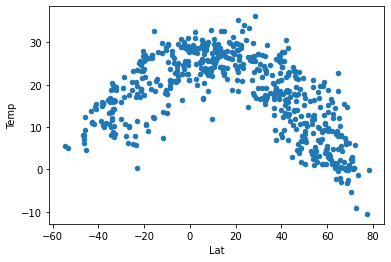

In [74]:
lat_vs_temp = clean_data_with_drop_na.plot(kind="scatter", y='Temp', x='Lat')
lat_vs_temp


## Latitude vs. Humidity Plot

<AxesSubplot:xlabel='Lat', ylabel='Humidity'>

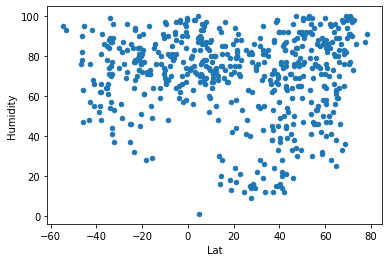

In [51]:
lat_vs_hum = clean_data_with_drop_na.plot(kind="scatter", y='Humidity', x='Lat')
lat_vs_hum

## Latitude vs. Cloudiness Plot

<AxesSubplot:xlabel='Lat', ylabel='Cloudiness'>

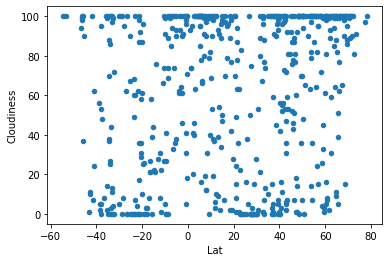

In [52]:
lat_vs_cl = clean_data_with_drop_na.plot(kind="scatter", y='Cloudiness', x='Lat')
lat_vs_cl

## Latitude vs. Wind Speed Plot

<AxesSubplot:xlabel='Lat', ylabel='Wind'>

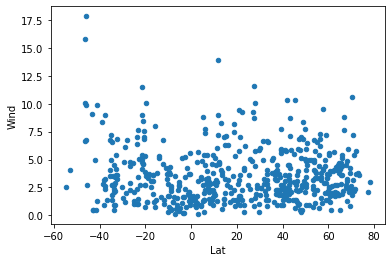

In [53]:
lat_vs_w = clean_data_with_drop_na.plot(kind="scatter", y='Wind', x='Lat')
lat_vs_w

## Linear Regression

In [54]:
northern = clean_data_with_drop_na.loc[clean_data_with_drop_na['Lat'] >= 0]
southern = clean_data_with_drop_na.loc[clean_data_with_drop_na['Lat'] < 0]
southern.tail(50) 


,city,Temp,Humidity,Cloudiness,Wind,Country,Lat,Lon,Date
412,santiago,14.36,70.0,0.0,0.93,CL,-33.4569,-70.6483,1.653101e+09
413,constitucion,10.60,85.0,2.0,3.48,CL,-35.3333,-72.4167,1.653102e+09
415,manoel urbano,19.98,81.0,69.0,0.49,BR,-8.8389,-69.2597,1.653102e+09
418,bambanglipuro,27.88,75.0,99.0,1.16,ID,-7.9500,110.2833,1.653102e+09
425,san luis,10.31,44.0,97.0,2.18,AR,-33.2950,-66.3356,1.653102e+09
426,tadine,23.33,90.0,100.0,11.46,NC,-21.5500,167.8833,1.653102e+09
436,raglan,15.64,66.0,53.0,8.99,NZ,-37.8000,174.8833,1.653101e+09
438,kikwit,21.04,97.0,93.0,0.68,CD,-5.0410,18.8162,1.653102e+09
440,beira,21.80,91.0,96.0,3.51,MZ,-19.8436,34.8389,1.653102e+09
441,kainantu,20.62,79.0,74.0,1.59,PG,-6.2887,145.8655,1.653102e+09


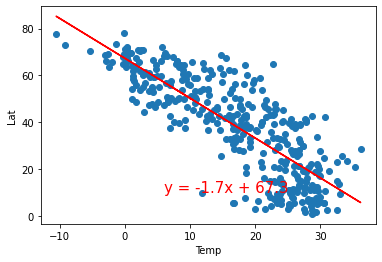

The r-value is: -0.8160470295326586


In [55]:
x_values = northern['Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

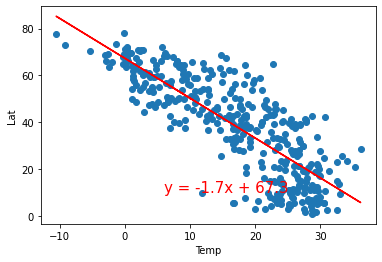

The r-value is: -0.8160470295326586


In [56]:
x_values = northern['Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

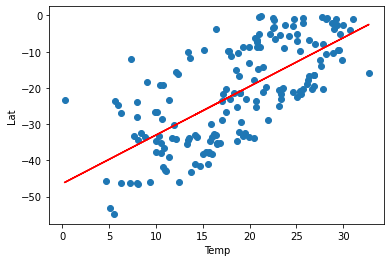

The r-value is: 0.6952305467765046


In [57]:
x_values = southern['Temp']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

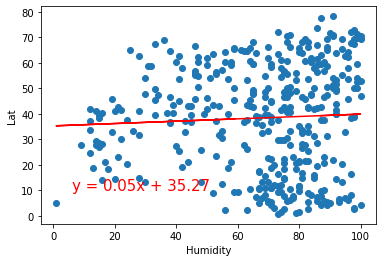

The r-value is: 0.051108040643745


In [58]:
x_values = northern['Humidity']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

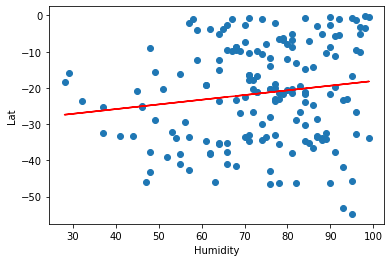

The r-value is: 0.14785871727704006


In [59]:
x_values = southern['Humidity']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

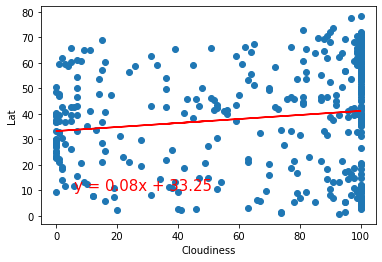

The r-value is: 0.14571749006453552


In [60]:
x_values = northern['Cloudiness']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

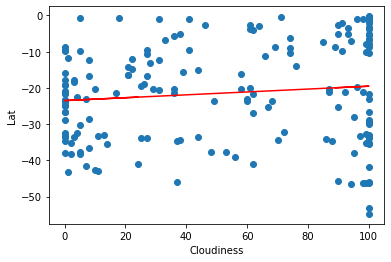

The r-value is: 0.11443690307793163


In [61]:
x_values = southern['Cloudiness']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

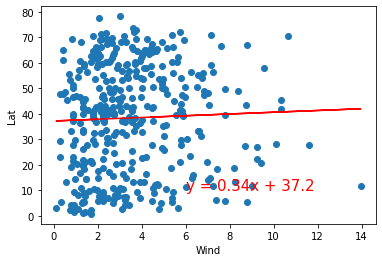

The r-value is: 0.03688106565023947


In [62]:
x_values = northern['Wind']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

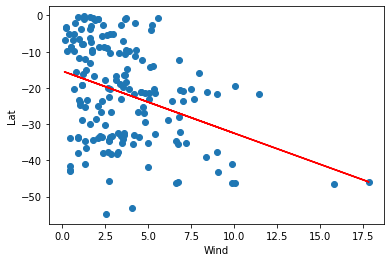

The r-value is: -0.3546266887860275


In [63]:
x_values = southern['Wind']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind')
plt.ylabel('Lat')
plt.show()
print(f"The r-value is: {rvalue}")